<a href="https://colab.research.google.com/github/mayank458746/My_Projects/blob/main/MNSIT_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!git clone https://github.com/mayank458746/sample_datsets
%cd sample_datsets

Cloning into 'sample_datsets'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 33 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.
/content/sample_datsets/sample_datsets/sample_datsets/sample_datsets


Importing the digital dependencies

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) #prevent the random in the aaccuracy of the machine learning model
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math  import confusion_matrix


Loading the MNIST data from keras.datasets

In [80]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [81]:
type(X_train)

numpy.ndarray

In [82]:
#shape of numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images

Test data = 10000 images

In [83]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [84]:
print(X_train[10].shape)

(28, 28)


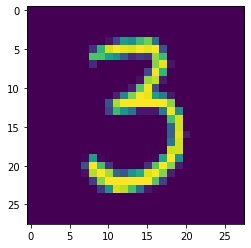

3


In [85]:
#displaying the image
plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(Y_train[50])

Image Labels

In [86]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [87]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use label or We can apply One Hot Encoding

All the images shold have same dataset if not image should be resized to common dimension

In [88]:
#scaling the values
X_train = X_train/255
X_test = X_test/255
#max value - 255/255 = 1
#min value - 0/255 = 0

In [89]:
#printing the 10th image after scaling

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [90]:
#setting up the layers of neural netwok

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),  #Flatten arrange on the value in one line
                          keras.layers.Dense(50, activation = 'relu'),  #50 classifies as number of neurons
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')  #10 classifies as number of labels 0-9                 
]) 

In [91]:
#compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [92]:
#training the neural network
model.fit(X_train,Y_train, epochs = 10) #epochs is how many times your neual network goes throgh the data

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0998 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0820 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training data accuracy = 98.9%

Accuracy on Test Data 

In [93]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9682
0.9682000279426575


Test Data Accuracy = 96.8%

In [94]:
print(X_test.shape)

(10000, 28, 28)


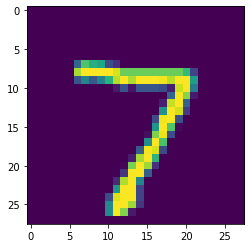

In [95]:
#first data point in the test data 
plt.imshow(X_test[0])
plt.show()

In [96]:
print(Y_test[0])

7


In [97]:
Y_pred = model.predict(X_test) #model.predict() gives the prediction probability of each class for that datapoint

In [98]:
print(Y_pred.shape)

(10000, 10)


In [99]:
print(Y_pred[0])

[1.1711831e-03 5.3797752e-01 7.8247511e-01 2.7959669e-01 3.3092193e-04
 6.4529770e-04 9.4834981e-08 9.9999928e-01 1.4456776e-02 2.5778236e-03]


In [100]:
#converting the prediction probabilities to class labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image) #value predicted by our model

7


In [101]:
#converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 8, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test = True Labels

Y_pred_labels = Predicted Labels

Confusion Matrix

In [102]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [103]:
print(conf_mat)

tf.Tensor(
[[ 961    1    0    1    0    4    3    1    8    1]
 [   0 1124    1    1    0    2    1    0    6    0]
 [   1    1 1001    2    4    2    1    6   13    1]
 [   0    0    6  967    1   22    0    3    8    3]
 [   1    1    3    0  951    5    8    1    3    9]
 [   3    0    0    3    2  878    2    1    3    0]
 [   4    1    1    0    5   17  924    0    6    0]
 [   1    9    7    4    3    0    0  995    5    4]
 [   0    0    2    3    6    8    0    5  950    0]
 [   3    4    0   11   25   12    1    8   13  932]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

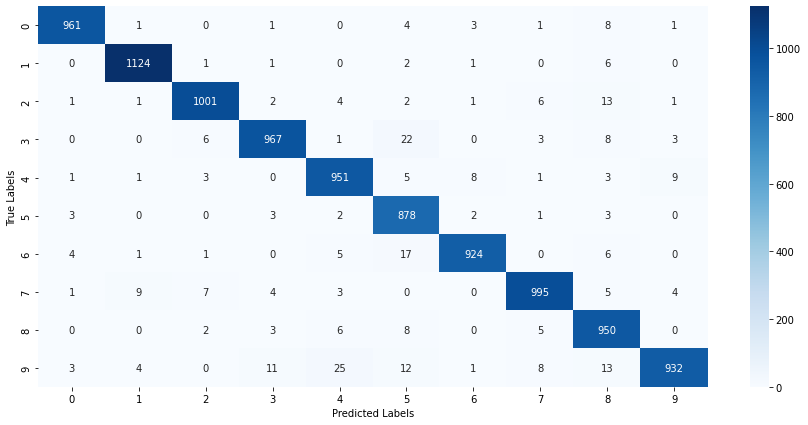

In [104]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues') #d stands for integers
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Buiding the predictive system

In [105]:
input_image_path = '/content/sample_datsets/sample_datsets/MNIST_5.jpg'
input_image = cv2.imread(input_image_path)

In [106]:
type(input_image)

numpy.ndarray

In [107]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


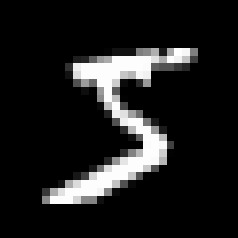

In [108]:
cv2_imshow(input_image)

In [109]:
input_image.shape

(238, 238, 3)

In [110]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [111]:
grayscale.shape

(238, 238)

In [112]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [113]:
input_image_resize.shape

(28, 28)

In [114]:
cv2_imshow(input_image_resize)

In [115]:
input_image_resize = input_image_resize/255

In [116]:
type(input_image_resize)

numpy.ndarray

In [117]:
image_reshaped = np.reshape(input_image_resize,[1,28,28]) # 1 signifies no of images as it is 1 # it is for grayscale image

In [118]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[2.80623340e-07 9.65175852e-02 1.11852065e-02 9.60583627e-01
  1.44135777e-06 9.99998808e-01 4.63232573e-06 5.46735764e-01
  1.31542906e-01 2.69805431e-01]]


In [119]:
input_pred_label = np.argmax(input_prediction)

In [120]:
print(input_pred_label)

5


**Predictive System**

Enter the path of the image/content/sample_datsets/sample_datsets/MNIST_5.jpg


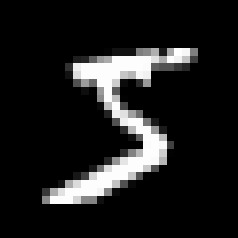

The digit is :  5


In [125]:
input_image_path = input("Enter the path of the image")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The digit is : ", input_pred_label)